In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
plt.style.use("fivethirtyeight")

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100


In [45]:
usa_entertainment = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Entertainment/extended_data/usa.csv"
canada_entertainment = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Entertainment/extended_data/canada.csv"
australia_entertainment = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Entertainment/extended_data/australia.csv"

usa_intellectualism = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Intellectualism/extended_data/usa.csv"
canada_intellectualism = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Intellectualism/extended_data/canada.csv"
australia_intellectualism = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Intellectualism/extended_data/australia.csv"

usa_nutrition = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Lifestyle/extended_data/usa.csv"
canada_nutrition = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Lifestyle/extended_data/canada.csv"
australia_nutrition = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Lifestyle/extended_data/australia.csv"

usa_politics = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Geopolitical/usa.csv"
canada_politics = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Geopolitical/canada.csv"
australia_politics = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Geopolitical/australia.csv"

usa_economics = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Economy/extended_data/usa.csv"
canada_economics = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Economy/extended_data/canada.csv"
australia_economics = "C:/Users/alkrd/Desktop/graduation_project/the_project/Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Economy/extended_data/australia.csv"

more_data_test = "./more_data_test.csv"

data = pd.read_csv(
    australia_entertainment,
    index_col=[0],
    parse_dates=[0]
    )

data.head()

,score
date,
2012-01-01,88
2012-01-02,74
2012-01-03,69
2012-01-04,68
2012-01-05,71


In [46]:
# configuations
split_date = "2016-02-01"
fig_size_config = (20,5)
testing_monitoring_lower_bound = datetime(2016, 4, 1)
testing_monitoring_upper_bound = datetime(2016, 9, 1)
tight_testing_monitoring_lower_bound = datetime(2016, 4, 1)
tight_testing_monitoring_upper_bound = datetime(2016, 9, 1)



[]

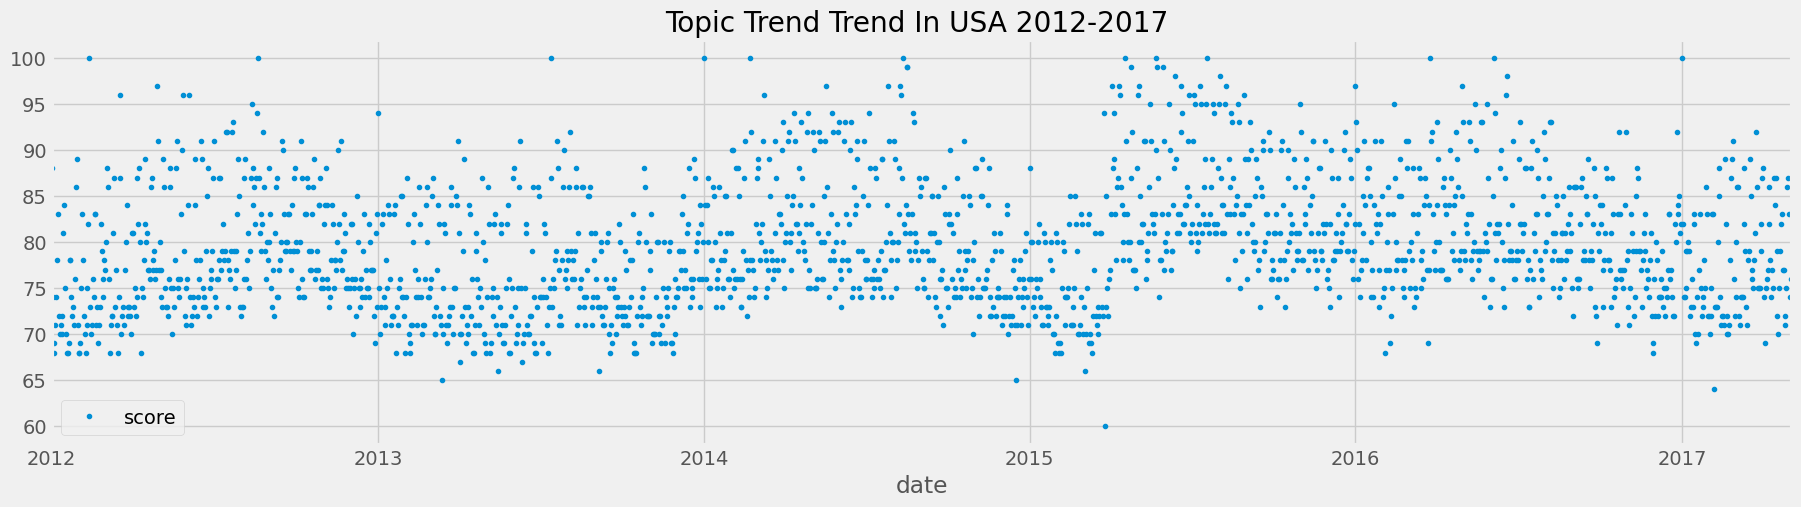

In [47]:
color_palette = sns.color_palette()
data.plot(
    style=".",
    figsize=fig_size_config,
    ms=6,
    color=color_palette[0],
    title="Topic Trend Trend In USA 2012-2017 ",
)
plt.plot()

In [48]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
def create_features(df, label=None):
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300
    
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall', 'Winter'])
    
    X = df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekday','season']]
    
    if label:
        y = df[label]
        return X,y
    return X


In [49]:
X, y = create_features(data, label='score')
features_and_target = pd.concat([X, y], axis=1)
features_and_target


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekday,season,score
date,,,,,,,,,,
2012-01-01,0,6,1,1,2012,1,1,Sunday,Winter,88
2012-01-02,0,0,1,1,2012,2,2,Monday,Winter,74
2012-01-03,0,1,1,1,2012,3,3,Tuesday,Winter,69
2012-01-04,0,2,1,1,2012,4,4,Wednesday,Winter,68
2012-01-05,0,3,1,1,2012,5,5,Thursday,Winter,71
...,...,...,...,...,...,...,...,...,...,...
2017-04-30,0,6,2,4,2017,120,30,Sunday,Spring,87
2017-05-01,0,0,2,5,2017,121,1,Monday,Spring,83
2017-05-02,0,1,2,5,2017,122,2,Tuesday,Spring,74


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


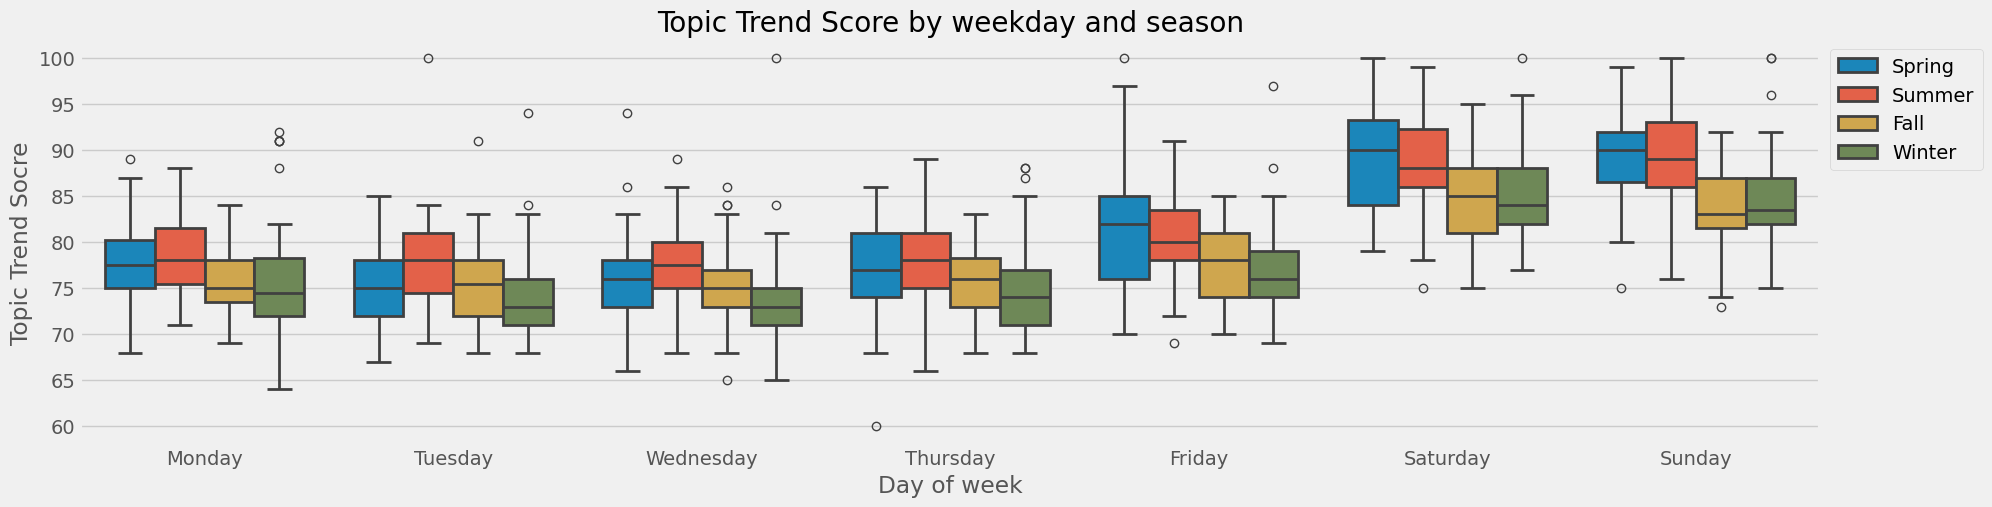

In [50]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(
    data=features_and_target.dropna(),
    x="weekday",
    y="score",
    hue="season",
    ax=ax,
    linewidth=2,
)

ax.set_title("Topic Trend Score by weekday and season")
ax.set_xlabel('Day of week')
ax.set_ylabel('Topic Trend Socre')
ax.legend(bbox_to_anchor=(1,1))
plt.show()

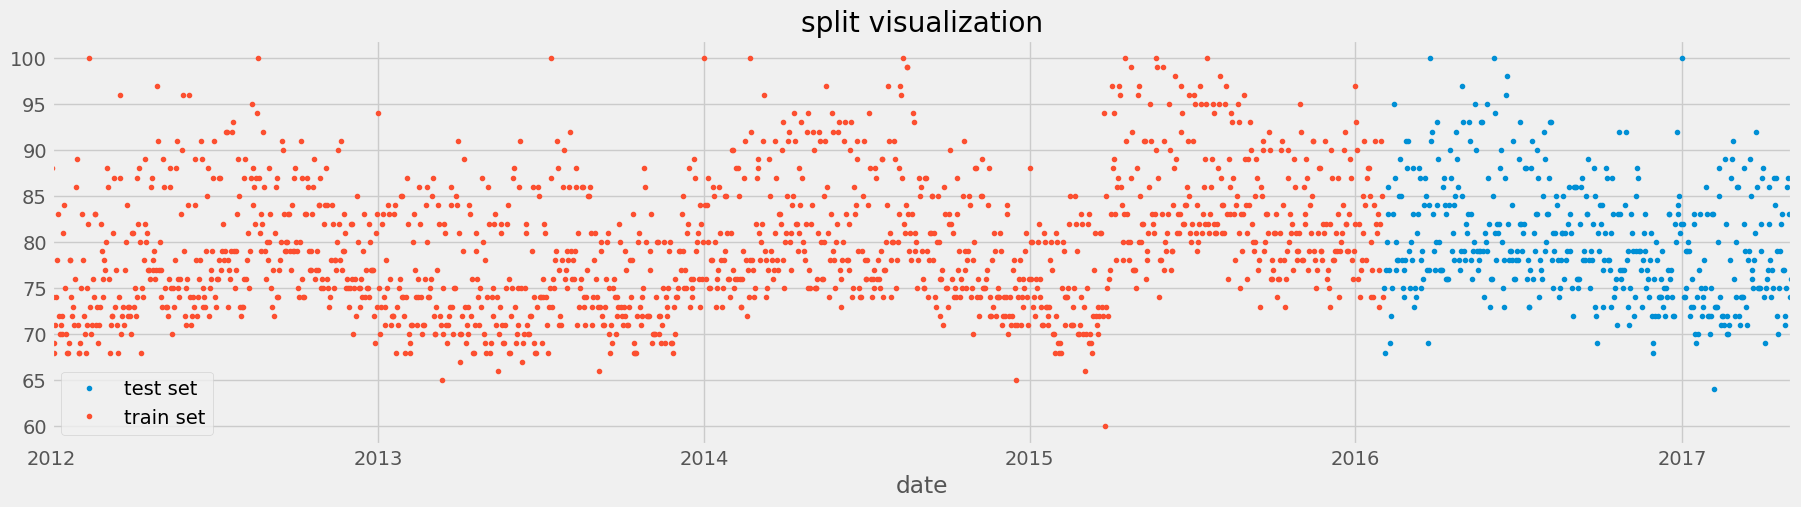

In [51]:

train_subset = data.loc[data.index <= split_date].copy()
test_subset = data.loc[data.index > split_date].copy()

# plotting them
test_subset \
    .rename(columns={'score':'test set'}) \
    .join(train_subset.rename(columns={'score':'train set'}), how='outer') \
    .plot(figsize=fig_size_config, ms=6, title='split visualization', style=".")
plt.show()

In [52]:
# rename the date and target columns to make them suitable for the prophet model
Pmodel_train_subset = train_subset.reset_index() \
    .rename(columns={
        'date':'ds',
        'score':'y'
    })

Pmodel_train_subset.head()
    

,ds,y
0,2012-01-01,88
1,2012-01-02,74
2,2012-01-03,69
3,2012-01-04,68
4,2012-01-05,71


In [53]:
%%time
model = Prophet()
model.fit(Pmodel_train_subset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


CPU times: total: 31.2 ms
Wall time: 555 ms


In [54]:
Pmodel_test_subset = test_subset.reset_index() \
    .rename(columns={
        'date':'ds',
        'score':'y' 
    })

forecasting_result = model.predict(Pmodel_test_subset)

In [55]:
forecasting_result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-02,85.699382,73.910992,83.142942,85.699382,85.699382,-7.208614,-7.208614,-7.208614,-3.863763,-3.863763,-3.863763,-3.344851,-3.344851,-3.344851,0.0,0.0,0.0,78.490768
1,2016-02-03,85.716889,73.615198,82.933074,85.716889,85.716889,-7.339010,-7.339010,-7.339010,-4.079736,-4.079736,-4.079736,-3.259274,-3.259274,-3.259274,0.0,0.0,0.0,78.377879
2,2016-02-04,85.734396,74.616740,83.741629,85.734396,85.734396,-6.458797,-6.458797,-6.458797,-3.300404,-3.300404,-3.300404,-3.158393,-3.158393,-3.158393,0.0,0.0,0.0,79.275599
3,2016-02-05,85.751903,77.173717,86.408411,85.751903,85.751903,-3.855891,-3.855891,-3.855891,-0.812300,-0.812300,-0.812300,-3.043591,-3.043591,-3.043591,0.0,0.0,0.0,81.896012
4,2016-02-06,85.769410,85.705591,94.634769,85.769410,85.769410,4.543410,4.543410,4.543410,7.459907,7.459907,7.459907,-2.916497,-2.916497,-2.916497,0.0,0.0,0.0,90.312820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2017-04-30,93.630060,91.460298,112.753066,83.499677,103.460752,8.854627,8.854627,8.854627,7.363784,7.363784,7.363784,1.490842,1.490842,1.490842,0.0,0.0,0.0,102.484686
454,2017-05-01,93.647567,80.973855,103.467099,83.483525,103.532235,-1.375684,-1.375684,-1.375684,-2.767489,-2.767489,-2.767489,1.391805,1.391805,1.391805,0.0,0.0,0.0,92.271882
455,2017-05-02,93.665074,79.404924,102.333892,83.467373,103.603718,-2.560020,-2.560020,-2.560020,-3.863763,-3.863763,-3.863763,1.303743,1.303743,1.303743,0.0,0.0,0.0,91.105054
456,2017-05-03,93.682581,79.691798,102.268984,83.451659,103.675200,-2.851735,-2.851735,-2.851735,-4.079736,-4.079736,-4.079736,1.228001,1.228001,1.228001,0.0,0.0,0.0,90.830846


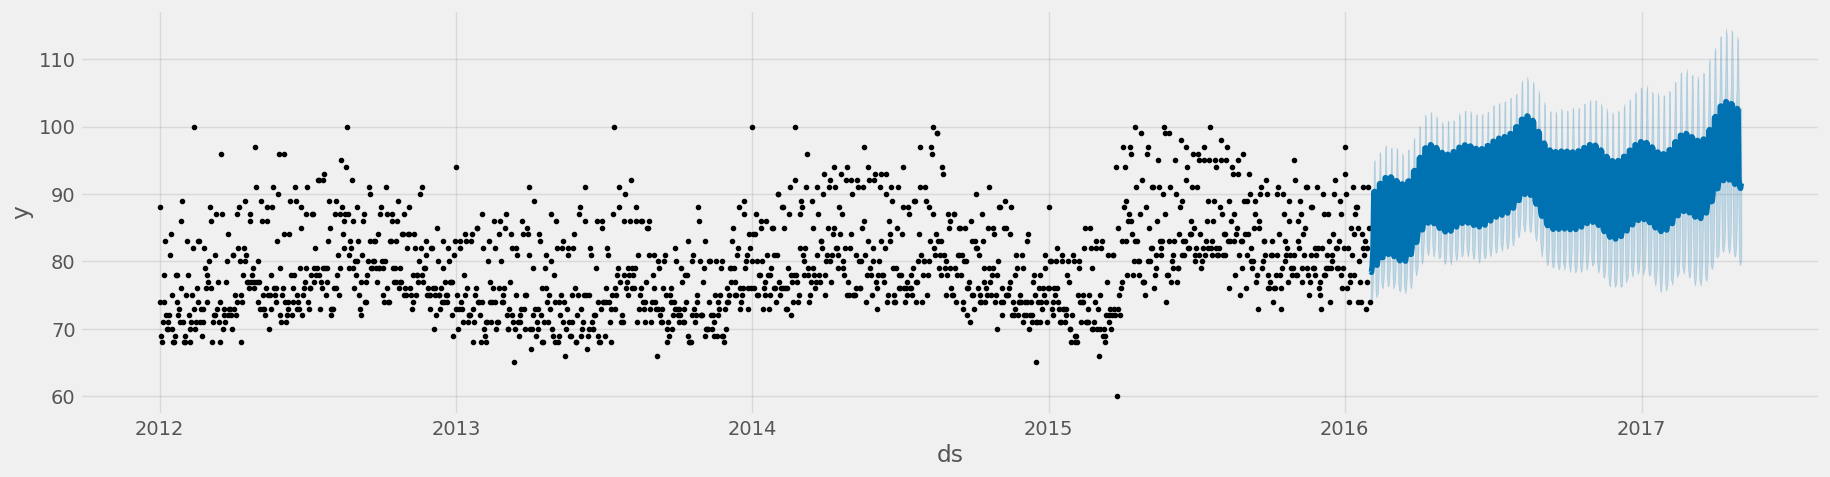

In [56]:
fig, ax = plt.subplots(figsize=fig_size_config)
fig = model.plot(forecasting_result, ax=ax)
plt.show()

# Note:
# the dark points are the predicted values, the light shadow represent the upper and
# lower bound of reasonable the prediction intervals/limits (as I understood)

# the intervals get wider as the prediction date gets further

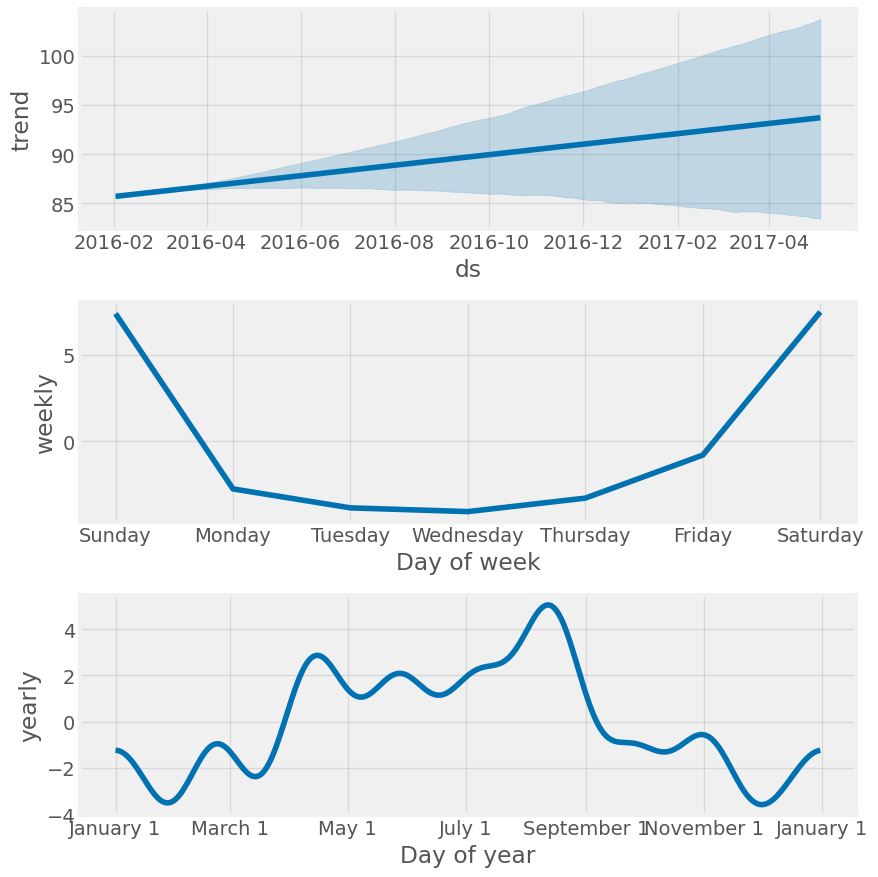

In [57]:
fig = model.plot_components(forecasting_result)
plt.show()

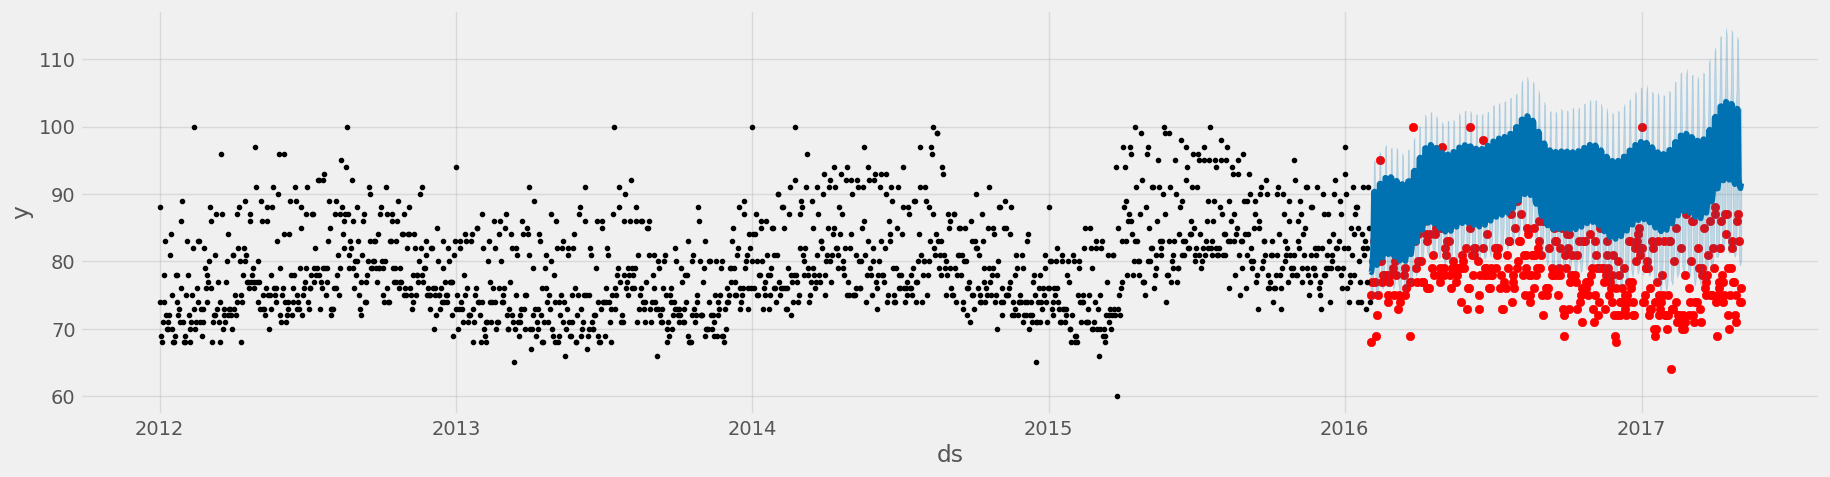

In [58]:
# comparing predictions to real data
f, ax = plt.subplots(figsize=fig_size_config)
ax.scatter(test_subset.index, test_subset['score'], color='r')
fig = model.plot(forecasting_result, ax=ax)

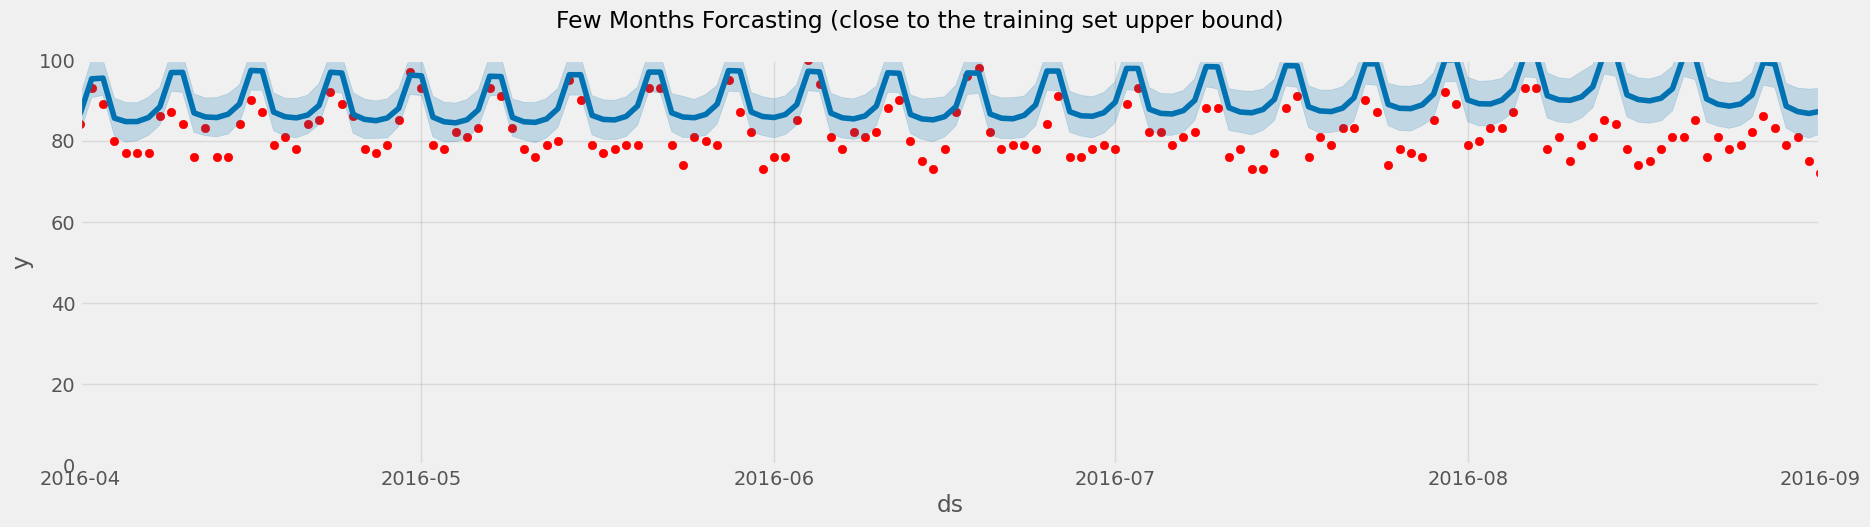

In [59]:

fig, ax = plt.subplots(figsize=fig_size_config)
ax.scatter(test_subset.index, test_subset["score"], color="r")
fig = model.plot(forecasting_result, ax=ax)
ax.set_xbound( 
    lower=testing_monitoring_lower_bound,
    upper=testing_monitoring_upper_bound
)
ax.set_ylim(0,100)
plot = plt.suptitle("Few Months Forcasting (close to the training set upper bound)")

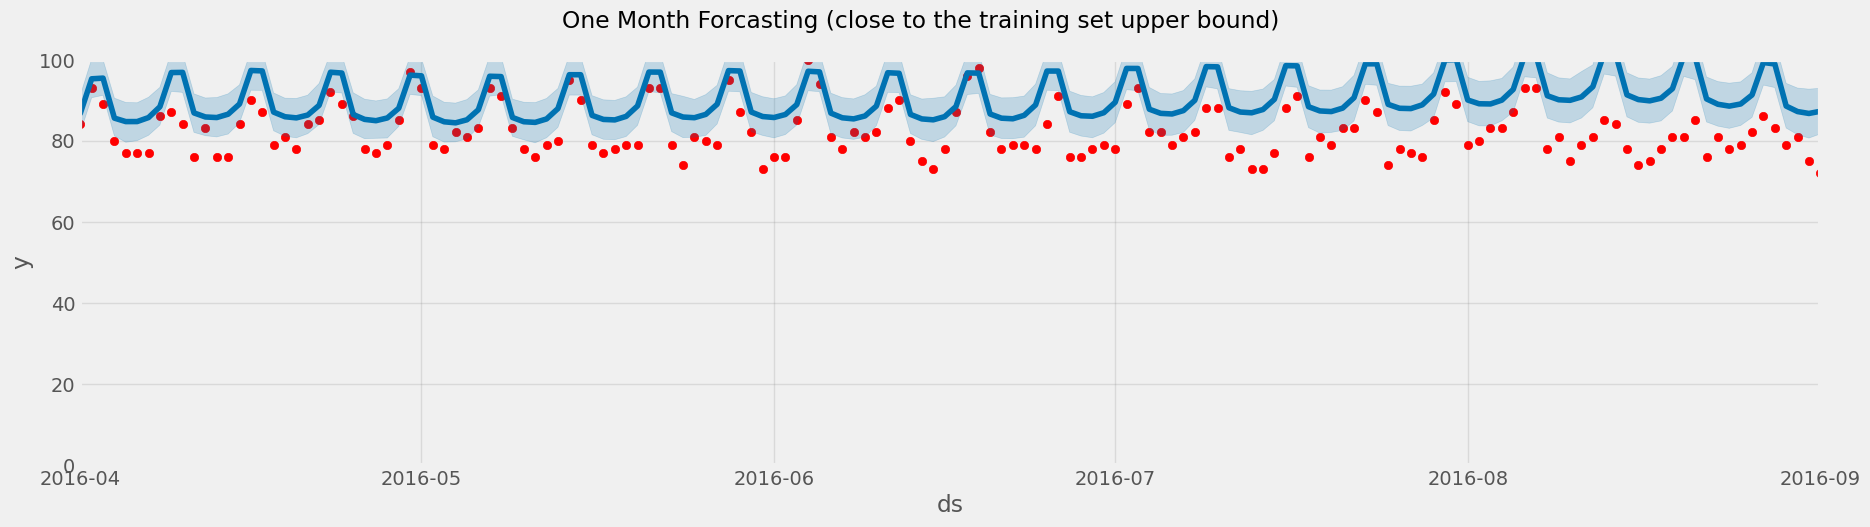

In [60]:
# closer look
fig, ax = plt.subplots(figsize=fig_size_config)
ax.scatter(test_subset.index, test_subset["score"], color="r")
fig = model.plot(forecasting_result, ax=ax)
ax.set_xbound( 
    lower=tight_testing_monitoring_lower_bound,
    upper=tight_testing_monitoring_upper_bound
)
ax.set_ylim(0,100)
plot = plt.suptitle("One Month Forcasting (close to the training set upper bound)")

In [61]:
# Evaluate using error metrics 
MSE = np.sqrt(mean_squared_error(y_true=test_subset['score'], y_pred=forecasting_result['yhat']))
print(MSE)

10.947850137167258


In [62]:
MAE = mean_absolute_error(y_true=test_subset['score'], y_pred=forecasting_result['yhat'])
print(MAE)

9.826623986515303


In [63]:
MAPE = mean_absolute_percentage_error(y_true=test_subset['score'], y_pred=forecasting_result['yhat'])
print(MAPE)


12.587383273153643


In [64]:
# predict the future
# assuming that the future starts after the training dataset date range.
future = model.make_future_dataframe(periods=458, freq='d', include_history=False)
forecast = model.predict(future)
forecast[['ds','yhat']]


,ds,yhat
0,2016-02-02,78.490768
1,2016-02-03,78.377879
2,2016-02-04,79.275599
3,2016-02-05,81.896012
4,2016-02-06,90.312820
...,...,...
453,2017-04-30,102.484686
454,2017-05-01,92.271882
455,2017-05-02,91.105054
456,2017-05-03,90.830846
